In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("EyeT_group_dataset_II_image_name_grey_blue_participant_2_trial_1.csv")
df.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,14388,6735083,515109903817,NaN,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,NaN,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
1,14389,6735083,515109903817,NaN,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,NaN,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
2,14390,6735678,515109904412,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
3,14391,6744010,515109912744,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN
4,14392,6752340,515109921074,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,...,416.0,Fixation,525.0,20.0,908.0,316.0,"0,4688","0,2924",NaN,NaN


# 1. Data Pre Processing

In [33]:
df['Recording timestamp'] = pd.to_datetime(df['Recording timestamp'])
df['Computer timestamp'] = pd.to_datetime(df['Computer timestamp'])
df['Recording date'] = pd.to_datetime(df['Recording date'])
df['Recording date UTC'] = pd.to_datetime(df['Recording date UTC'])
df['Recording start time'] = pd.to_datetime(df['Recording start time'])
df['Recording start time UTC'] = pd.to_datetime(df['Recording start time UTC'])


<ipython-input-33-afce5e0bd171>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Recording date'] = pd.to_datetime(df['Recording date'])
<ipython-input-33-afce5e0bd171>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Recording date UTC'] = pd.to_datetime(df['Recording date UTC'])


In [34]:
columns_to_drop = ['Export date', 'Recording name', 'Recording duration', 'Recording Fixation filter name', 'Recording software version', 'Recording resolution height', 'Recording resolution width', 'Recording monitor latency', 'Event', 'Event value', 'Validity left', 'Validity right', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Presented Media name', 'Presented Media position X (DACSpx)', 'Presented Media position Y (DACSpx)', 'Original Media width', 'Original Media height', 'Gaze event duration', 'Eye movement type index', 'Mouse position X', 'Mouse position Y']
df.drop(columns_to_drop, axis=1, inplace=True)


In [35]:
column_names = {'Recording timestamp': 'recording_timestamp', 'Computer timestamp': 'computer_timestamp', 'Sensor': 'sensor', 'Project name': 'project_name', 'Participant name': 'participant_name', 'Recording date': 'recording_date', 'Recording date UTC': 'recording_date_utc', 'Recording start time': 'recording_start_time', 'Recording start time UTC': 'recording_start_time_utc', 'Timeline name': 'timeline_name', 'Gaze point X': 'gaze_point_x', 'Gaze point Y': 'gaze_point_y', 'Gaze point left X': 'gaze_point_left_x', 'Gaze point left Y': 'gaze_point_left_y', 'Gaze point right X': 'gaze_point_right_x', 'Gaze point right Y': 'gaze_point_right_y', 'Gaze direction left X': 'gaze_direction_left_x', 'Gaze direction left Y': 'gaze_direction_left_y', 'Gaze direction left Z': 'gaze_direction_left_z', 'Gaze direction right X': 'gaze_direction_right_x','Gaze direction right Y': 'gaze_direction_right_y', 'Gaze direction right Z': 'gaze_direction_right_z', 'Pupil diameter left': 'pupil_diameter_left', 'Pupil diameter right': 'pupil_diameter_right', 'Presented Stimulus name': 'presented_stimulus_name', 'Presented Media width': 'presented_media_width', 'Presented Media height': 'presented_media_height', 'Eye movement type': 'eye_movement_type', 'Fixation point X': 'fixation_point_x', 'Fixation point Y': 'fixation_point_y', 'Fixation point X (MCSnorm)': 'fixation_point_x_norm', 'Fixation point Y (MCSnorm)': 'fixation_point_y_norm'}
df.rename(columns=column_names, inplace=True)



## Convert columns with non-numeric data to category type:

In [36]:
df['sensor'] = df['sensor'].astype('category')
df['project_name'] = df['project_name'].astype('category')
df['participant_name'] = df['participant_name'].astype('category')
df['timeline_name'] = df['timeline_name'].astype('category')
df['presented_stimulus_name'] = df['presented_stimulus_name'].astype('category')
df['eye_movement_type'] = df['eye_movement_type'].astype('category')


## Convert columns with boolean data to bool type:

In [37]:
df['gaze_direction_left_z'] = df['gaze_direction_left_z'].astype(bool)
df['gaze_direction_right_z'] = df['gaze_direction_right_z'].astype(bool)


## Normalize numeric data:

In [40]:
df['gaze_point_x'] = df['gaze_point_x'] / df['presented_media_width']
df['gaze_point_y'] = df['gaze_point_y'] / df['presented_media_height']
df['gaze_point_left_x'] = df['gaze_point_left_x'] / df['presented_media_width']
df['gaze_point_left_y'] = df['gaze_point_left_y'] / df['presented_media_height']
df['gaze_point_right_x'] = df['gaze_point_right_x'] / df['presented_media_width']
df['gaze_point_right_y'] = df['gaze_point_right_y'] / df['presented_media_height']



# 3. Predicting an empathy score

<Axes: xlabel='gaze_point_x', ylabel='Count'>

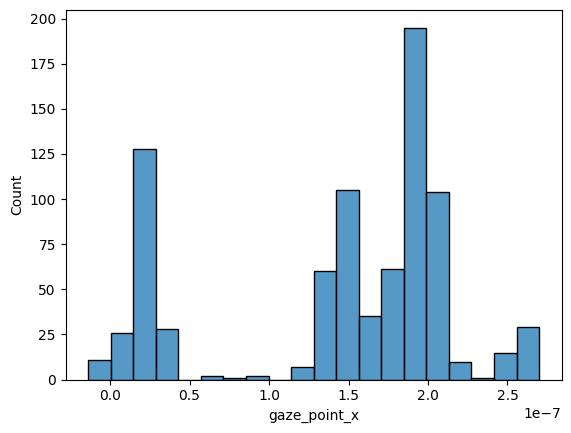

In [41]:

import seaborn as sns
sns.histplot(df['gaze_point_x'])


<ipython-input-42-0b2dcc63be37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

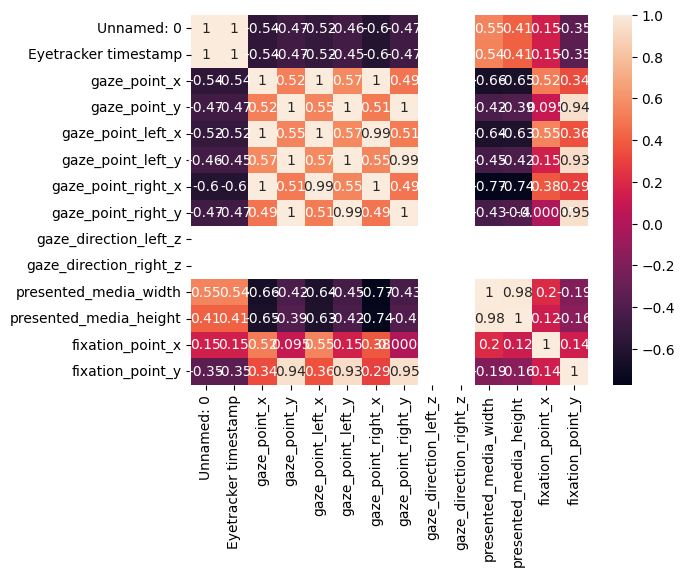

In [42]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)


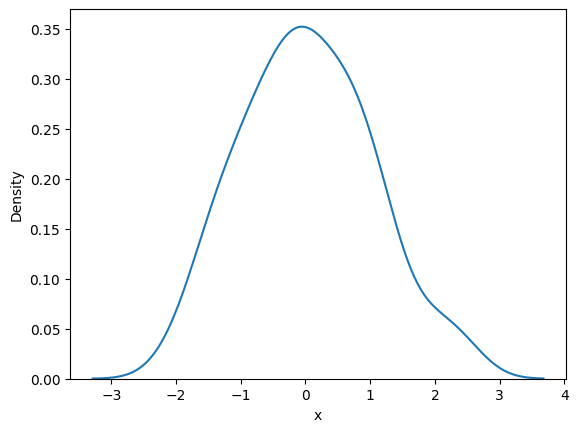

In [25]:
import seaborn as sns
import numpy as np
import pandas as pd

# Generate some random data
data = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})

# Generate a random plot using seaborn
plot_type = np.random.choice(['scatter', 'line', 'histogram', 'kde'])
if plot_type == 'scatter':
    sns.scatterplot(x='x', y='y', data=data)
elif plot_type == 'line':
    sns.lineplot(x='x', y='y', data=data)
elif plot_type == 'histogram':
    sns.histplot(x='x', data=data)
else:
    sns.kdeplot(x='x', data=data)


<Axes: ylabel='Count'>

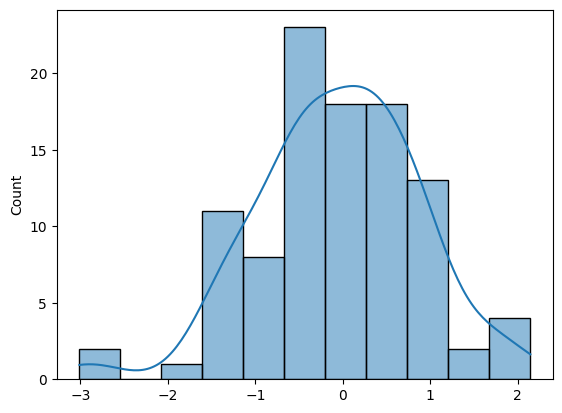

In [26]:
import seaborn as sns
import numpy as np

# Generate random data
data = np.random.normal(loc=0, scale=1, size=100)

# Create a histogram with a density curve
sns.histplot(data, kde=True)


<Axes: xlabel='gaze_point_x', ylabel='gaze_point_y'>

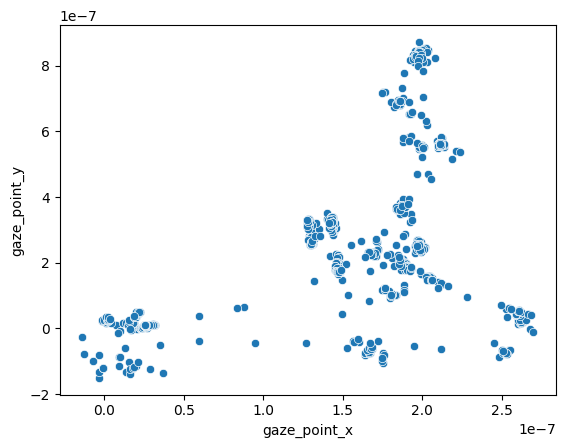

In [43]:
sns.scatterplot(x='gaze_point_x', y='gaze_point_y', data=df)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['gaze_point_x', 'gaze_point_y', 'eye_movement_type_index', 'fixation_point_x_norm', 'fixation_point_y_norm']]
y = df['empathy_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


KeyError: ignored

# 4. 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sensor'], axis=1), df['sensor'], test_size=0.3, random_state=42)


In [46]:
X_train_encoded = pd.get_dummies(X_train, columns=['project_name', 'participant_name', 'timeline_name', 'presented_stimulus_name', 'eye_movement_type'])
X_test_encoded = pd.get_dummies(X_test, columns=['project_name', 'participant_name', 'timeline_name', 'presented_stimulus_name', 'eye_movement_type'])


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['gaze_point_x', 'gaze_point_y', 'gaze_point_left_x', 'gaze_point_left_y', 'gaze_point_right_x', 'gaze_point_right_y', 'fixation_point_x', 'fixation_point_y', 'fixation_point_x_norm', 'fixation_point_y_norm']

X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
float_list1 = [float(x) for x in string_list]
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])


ValueError: ignored

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_encoded, y_train)


TypeError: ignored

In [52]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_encoded)

print(classification_report(y_test, y_pred))


TypeError: ignored

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_encoded, y_train, cv=5)

print('Cross-validation scores:', scores)
print('Average cross-validation score:', np.mean(scores))


TypeError: ignored

In [54]:
!jupyter nbconvert --to html EYE_TRACKER.ipynb


[NbConvertApp] Converting notebook EYE_TRACKER.ipynb to html
[NbConvertApp] Writing 978879 bytes to EYE_TRACKER.html
